<a href="https://colab.research.google.com/github/Nesrine1333/Fraud_Detection/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [297]:
df = pd.read_csv("Synthetic Financial Datasets For Fraud Detection.csv")

In [298]:
df.shape

(97225, 11)

In [299]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [300]:
df3=df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [301]:
df3.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0


In [302]:
df3['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

Using one shot encoding is the best option since the goal is working with categories


In [303]:
dummies=pd.get_dummies(df3['type']).drop(['CASH_IN'],axis=1) #the matric thate we will use for converting
dummies

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
97220,0,0,1,0
97221,0,0,1,0
97222,0,0,1,0
97223,0,0,1,0


In [304]:
df4= pd.concat([df3, dummies],axis=1).drop(['type'], axis=1)
df4

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
97220,10,17011.46,0.0,0.00,0.0,0.0,0.0,0,0,1,0
97221,10,1680.50,0.0,0.00,0.0,0.0,0.0,0,0,1,0
97222,10,26450.83,0.0,0.00,0.0,0.0,0.0,0,0,1,0
97223,10,12171.47,0.0,0.00,0.0,0.0,0.0,0,0,1,0


In [305]:
df4 = df4.dropna(subset=["newbalanceDest","isFraud"])

In [306]:
X_train, X_test, y_train, y_test=train_test_split(df4.drop(['isFraud'],axis=1),df4.isFraud,test_size=0.2,random_state=False)

In [307]:
X_test.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
36093,9,53022.99,0.0,0.00,115713.56,168736.55,1,0,0,0
94146,10,12482.25,0.0,0.00,0.00,0.00,0,0,1,0
11143,7,10303.86,123872.0,113568.14,0.00,0.00,0,0,1,0
40421,9,16255.01,0.0,0.00,0.00,0.00,0,0,1,0
13057,7,25065.56,0.0,0.00,58329.95,246975.01,1,0,0,0


In [308]:
X_test.shape


(19445, 10)

In [309]:
model =LogisticRegression()

In [310]:
model.fit(X_train,y_train)

LogisticRegression()

In [311]:
model.score(X_test,y_test)

0.9990228850604268

The score is too high , it can't be that way ,it's happening because of tha data imbalance

In [312]:
df4['isFraud'].unique()

array([0., 1.])

In [313]:
df4.groupby('isFraud').sum()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,,,,,,
0.0,821557,1.670188e+10,8.542829e+10,8.707277e+10,8.546052e+10,1.148735e+11,29781,976,38477,8315
1.0,647,6.181629e+07,6.310756e+07,3.373336e+06,2.634272e+07,7.581943e+07,58,0,0,56


#Confusion Matrix


In [314]:
predict=model.predict(X_test)

In [315]:
cm = confusion_matrix(y_test,predict)

Text(50.722222222222214, 0.5, 'actuals')

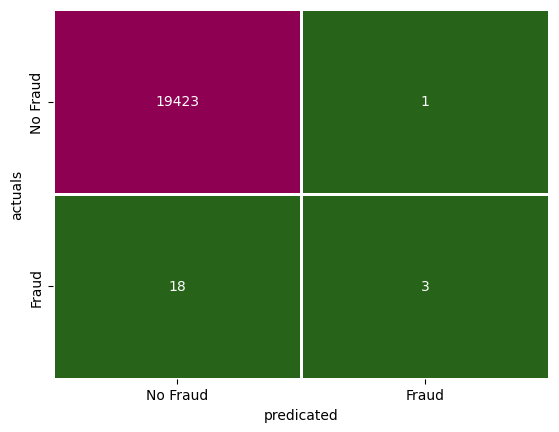

In [316]:
sns.heatmap(cm,cmap='PiYG_r',annot=True,fmt='d',cbar=False,linecolor='white',linewidths=2)
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel("predicated")
plt.ylabel("actuals")


In [317]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19424
         1.0       0.75      0.14      0.24        21

    accuracy                           1.00     19445
   macro avg       0.87      0.57      0.62     19445
weighted avg       1.00      1.00      1.00     19445



We need to take another look on the originale Data

In [318]:
df = pd.read_csv("Synthetic Financial Datasets For Fraud Detection.csv")

In [319]:
df.groupby('isFlaggedFraud').count()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
isFlaggedFraud,,,,,,,,,,
0.0,97224,97224,97224,97224,97224,97224,97224,97224,97224,97224


In [320]:
df.groupby('type').count()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,,,
CASH_IN,19561,19561,19561,19561,19561,19561,19561,19561,19561,19561
CASH_OUT,29839,29839,29839,29839,29839,29839,29839,29839,29839,29839
DEBIT,976,976,976,976,976,976,976,976,976,976
PAYMENT,38478,38478,38478,38478,38478,38478,38478,38477,38477,38477
TRANSFER,8371,8371,8371,8371,8371,8371,8371,8371,8371,8371


In [321]:
df.pivot_table(values='amount',index='type',columns='isFraud',aggfunc='count')

isFraud,0.0,1.0
type,,
CASH_IN,19561.0,NaN
CASH_OUT,29781.0,58.0
DEBIT,976.0,NaN
PAYMENT,38477.0,NaN
TRANSFER,8315.0,56.0


In [322]:
#we're only going to need the ones that have frauds
#since it's only 2 we don't need to use One-Hot encoding , we can use 0 and 1
dfFltrd=df[df.type.isin(['CASH_OUT','TRANSFER'])]
dfFltrd.pivot_table(values='amount',index='type',columns='isFraud',aggfunc='count')

isFraud,0.0,1.0
type,,
CASH_OUT,29781,58
TRANSFER,8315,56


In [323]:
encoder=LabelEncoder()


In [324]:
dfFltrd['typeEncoded']=encoder.fit_transform(dfFltrd['type'])
dfFltrd.pivot_table(values='amount',index='typeEncoded',columns='isFraud',aggfunc='count')

<ipython-input-324-8186b2b4ec4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFltrd['typeEncoded']=encoder.fit_transform(dfFltrd['type'])


isFraud,0.0,1.0
typeEncoded,,
0,29781,58
1,8315,56


In [325]:
dfFltrd

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,typeEncoded
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0.0,0.0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0.0,0.0,1
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
97181,10,CASH_OUT,99472.32,C1704011975,0.00,0.00,C377957453,777264.84,876737.16,0.0,0.0,0
97182,10,CASH_OUT,2695.92,C718493715,6342.00,3646.08,C147916733,1781392.96,1856223.23,0.0,0.0,0
97203,10,CASH_OUT,366571.04,C1201570470,119937.47,0.00,C1291664589,425199.81,662002.73,0.0,0.0,0
97208,10,CASH_OUT,52257.98,C1762578096,11061.00,0.00,C2019043622,18751.39,71009.37,0.0,0.0,0


In [326]:
dff=dfFltrd.drop(['step','type','nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [327]:
dff.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeEncoded
2,181.00,181.0,0.0,0.0,0.00,1.0,1
3,181.00,181.0,0.0,21182.0,0.00,1.0,0
15,229133.94,15325.0,0.0,5083.0,51513.44,0.0,0
19,215310.30,705.0,0.0,22425.0,0.00,0.0,1
24,311685.89,10835.0,0.0,6267.0,2719172.89,0.0,1


In [328]:
X_train, X_test, y_train, y_test =train_test_split(dff.drop(['isFraud'],axis=1),dff.isFraud,test_size=0.2,random_state=False)

In [329]:
Model= LogisticRegression()

In [330]:
Model.fit(X_train, y_train)

LogisticRegression()

In [331]:
predict_variable=Model.predict(X_test)

In [332]:
Model.score(X_test,y_test)

0.9979063072494111

Confusion Matrix

In [333]:
cm = confusion_matrix(y_test,predict_variable)
cm

array([[7609,   11],
       [   5,   17]])

Text(50.722222222222214, 0.5, 'actuals')

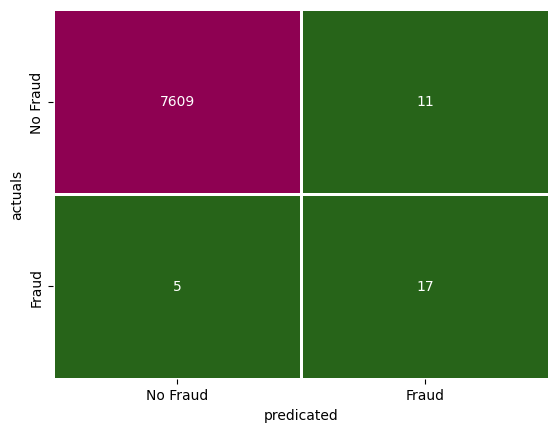

In [334]:
sns.heatmap(cm,cmap='PiYG_r',annot=True,fmt='d',cbar=False,linecolor='white',linewidths=2)
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel("predicated")
plt.ylabel("actuals")


In [335]:
print(classification_report(y_test,predict_variable))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7620
         1.0       0.61      0.77      0.68        22

    accuracy                           1.00      7642
   macro avg       0.80      0.89      0.84      7642
weighted avg       1.00      1.00      1.00      7642



#Decision Tree Classifier

In [339]:
dtm= DecisionTreeClassifier()

In [341]:
dtm.fit(X_train ,y_train)

DecisionTreeClassifier()

In [342]:
dtm.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [343]:
Tpredicted = dtm.predict(X_test)

Confusion Matrix

In [344]:
cm = confusion_matrix(y_test,Tpredicted)
cm

array([[7608,   12],
       [  11,   11]])

Text(50.722222222222214, 0.5, 'actuals')

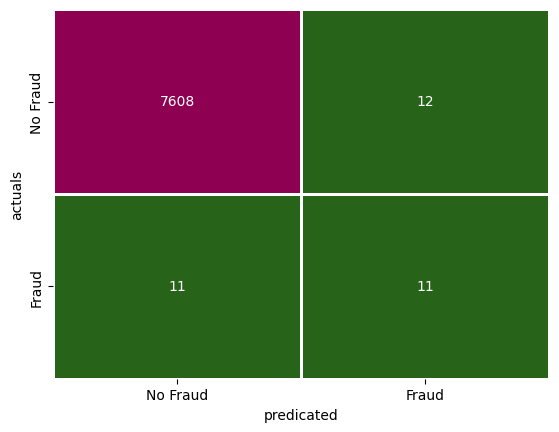

In [345]:
sns.heatmap(cm,cmap='PiYG_r',annot=True,fmt='d',cbar=False,linecolor='white',linewidths=2)
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel("predicated")
plt.ylabel("actuals")

In [346]:
print(classification_report(y_test,Tpredicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7620
         1.0       0.48      0.50      0.49        22

    accuracy                           1.00      7642
   macro avg       0.74      0.75      0.74      7642
weighted avg       1.00      1.00      1.00      7642

